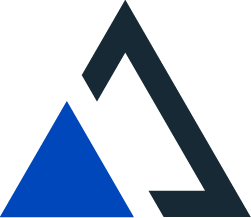

<h1><font color='#0047BB'>Auto Semantic Model Creation</font></h1>

Auto Semantic Model Creation allows AI-Link users to automatically generate a semantic model based off of a pandas DataFrame or source table in a data warehouse. It allows data professionals working in Python environments to quickly and easily render their insights in a BI-consumable format, allowing for standardized yet flexible sharing of data across an organization’s teams. 

In [1]:
import pandas as pd

from atscale.base import config
from atscale.client import Client
from atscale.db.connections.snowflake import Snowflake

<h3><font color='#0047BB'>Connect to AtScale</font></h3>

In [4]:
client = Client(
    server=..., 
    username=..., 
    organization=...,
)

client.connect()

<h3><font color='#0047BB'>Connect to Data Warehouse</font></h3>

In [5]:
db = Snowflake(
    username=...,
    password=...,
    account=...,
    warehouse=...,
    database=...,
    schema=...,
    warehouse_id=...,
)

<h3><font color='#0047BB'>Create a DataFrame as the Basis for a New Semantic Model</font></h3>

We'll create a test dataset describing the outcomes of a few different salespeople.

In [6]:
df = pd.DataFrame({
    'salesperson_name': ['allison', 'bob', 'carter', 'denise'], 
    'store_state': ["MA", "MA", "NH", "RI"], 
    'date_of_shift': pd.to_datetime(["2013-9-30", "2013-10-8", "2013-11-1", "2013-12-23"]),
    'units_sold': [13, 12, 2, 24],
})

df.head()

salesperson_name store_state date_of_shift  units_sold
0          allison          MA    2013-09-30          13
1              bob          MA    2013-10-07          12
2           carter          NH    2013-11-01           2
3           denise          RI    2013-12-23          24

Once we define the name of our new project and table name:

In [7]:
new_project_name = "SALESPERSON_DATA_PROJECT"
new_table_name = "SALESPERSON_DATA"

we can create a semantic model based off of this data as follows:

In [8]:
new_project = client.autogen_semantic_model(
    dbconn=db,
    warehouse_id=...,
    project_name=new_project_name,
    table_name=new_table_name,
    dataframe=df,
)

/Users/patrickmcdonald/GitHub/python-api/atscale/db/connections/snowflake.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[colV] = dataframe[colV].dt.date
09/06/2024 08:29:09 AM WARNING:Column name: salesperson_name appears as SALESPERSON_NAME
09/06/2024 08:29:09 AM WARNING:Column name: store_state appears as STORE_STATE
09/06/2024 08:29:09 AM WARNING:Column name: date_of_shift appears as DATE_OF_SHIFT
09/06/2024 08:29:09 AM WARNING:Column name: units_sold appears as UNITS_SOLD
/Users/patrickmcdonald/GitHub/python-api/atscale/db/connections/snowflake.py:396: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

When we open up AtScale, we'll see that a new project called `SALESPERSON_DATA_PROJECT` has been added. Clicking through to the canvas, we see this:

![title](asmc_in_canvas.png)

The DataFrame we provided has been converted to a table in our data warehouse (Snowflake in this case). Additionally we see that several dimensions/hierarchies have been automatically generated with respect to the categorical features in our data (including a date dimension with a year/month/date hierarchy), as well as a measure capturing total sales. 

From here, users are free to explore this model in the AtScale UI, adding new dimensions, hierarchies, attributes, and other components to tailor it further to the organization’s needs.